# ML EX 8

Download MNIST dataset, apply PCA from scratch.

In [7]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/harikrish/Documents/College/Sem 6/ML lab/Ex 8/mnist.csv")

In [9]:
label = df.label.astype(int)
df.drop("label", axis=1, inplace=True)
df.shape

(42000, 784)

In [10]:
standardized_data = StandardScaler().fit_transform(df)

In [11]:
sample_data = standardized_data
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(784, 784)

In [12]:
eig_values, eig_vectors = eigh(cov_matrix)
print(eig_values)
print(eig_vectors)

[-5.15488736e-10 -3.04556546e-10 -1.99584487e-10 -1.67903046e-10
 -8.62024010e-11 -5.35285609e-11 -2.54177119e-11 -1.06818692e-11
 -6.40800111e-12 -5.32494636e-12 -2.38804230e-12 -2.07503739e-12
 -1.86793799e-12 -1.19219889e-12 -8.32078263e-13 -6.07662011e-13
 -4.29829311e-13 -1.14297629e-13 -8.01164397e-14 -6.79498373e-16
 -7.83598132e-29 -6.75714114e-29 -4.85498540e-29 -7.68169369e-30
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.84602126e-17  1.36134284e-15  2.23378206e-15  4.50347950e-15
  4.58204919e-15  1.21363896e-14  1.85432157e-13  2.00602881e-13
  2.77197133e-13  2.99924193e-13  3.75878409e-13  4.40152038e-13
  4.49007310e-13  5.45926663e-13  5.46480173e-13  6.65366099e-13
  1.09025464e-12  1.41355952e-12  2.24963238e-12  3.32477582e-12
  4.32782718e-12  7.07349

In [13]:
eig_values = eig_values[-2:]
eig_vectors = eig_vectors[:,-2:]
eig_vectors = eig_vectors.T
print("Shape of eigen value: ", eig_values.shape)
print("Shape of eigen eig_vectors: ", eig_vectors.shape)

Shape of eigen value:  (2,)
Shape of eigen eig_vectors:  (2, 784)


In [14]:
reduced_data = np.matmul(eig_vectors, sample_data.T)
reduced_data.shape

(2, 42000)

In [15]:
reduced_data = np.vstack((reduced_data, label))
reduced_data = reduced_data.T

In [16]:
reduced_df = pd.DataFrame(reduced_data, columns=['X', 'Y', 'label'])
reduced_df.label = reduced_df.label.astype(int)
reduced_df.head()

,X,Y,label
0,-5.226445,-5.140478,1
1,6.032996,19.292332,0
2,-1.705813,-7.644503,1
3,5.836139,-0.474207,4
4,6.024818,26.559574,0


In [17]:
reduced_df.dtypes

X        float64
Y        float64
label      int64
dtype: object

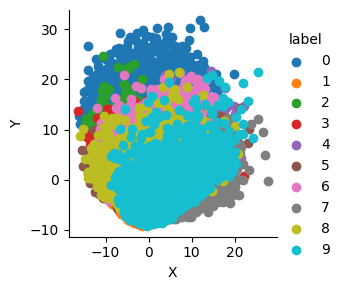

In [18]:
g = sns.FacetGrid(reduced_df, hue='label').map(plt.scatter, 'X', 'Y').add_legend()